# Credit Risk Ensemble Techniques

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split

# Read the CSV and Perform Basic Data Cleaning

In [4]:
# Load the data
file_path = Path('Resources/lending_data.csv')
df = pd.read_csv(file_path)
df.dropna(inplace = True)

df.head()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,own,52800,0.431818,5,1,22800,low_risk
1,8400.0,6.692,own,43600,0.311927,3,0,13600,low_risk
2,9000.0,6.963,rent,46100,0.349241,3,0,16100,low_risk
3,10700.0,7.664,own,52700,0.430740,5,1,22700,low_risk
4,10800.0,7.698,mortgage,53000,0.433962,5,1,23000,low_risk


# Split the Data into Training and Testing

In [10]:
# Create our features
X = df.drop(columns="loan_status")
X = pd.get_dummies(X)
# Create our target
y = df["loan_status"]

In [11]:
X.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,homeowner_mortgage,homeowner_own,homeowner_rent
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.497472,0.398911,0.103616
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.499997,0.489678,0.304764
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000,0.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000,0.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,1.000000,1.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000,1.000000,1.000000


In [12]:
# Check the balance of our target values
# YOUR CODE HERE
#y.describe()
y.value_counts()


low_risk     75036
high_risk     2500
Name: loan_status, dtype: int64

In [13]:
# Split the X and y into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   random_state=1,
                                                   stratify = y)
X_train.shape

(58152, 10)

# Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Print the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier onely, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [14]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
rf = BalancedRandomForestClassifier(n_estimators=500, random_state = 100)
rf.fit(X_train, y_train)

BalancedRandomForestClassifier(n_estimators=500, random_state=100)

In [15]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
y_pred = rf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9935486113332267

In [16]:
# Display the confusion matrix
# YOUR CODE HERE
confusion_matrix(y_test, y_pred)

array([[  622,     3],
       [  152, 18607]], dtype=int64)

In [17]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.80      1.00      0.99      0.89      0.99      0.99       625
   low_risk       1.00      0.99      1.00      1.00      0.99      0.99     18759

avg / total       0.99      0.99      1.00      0.99      0.99      0.99     19384



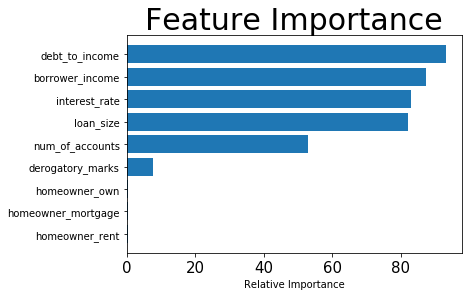

In [24]:
# List the features sorted in descending order by feature importance
# YOUR CODE HERE
importance = rf.feature_importances_
# checking which are the most important features
feature_importance = rf.fit(X_train, y_train).feature_importances_
# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[-20:-1:1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
#sns.despine(left=True, bottom=True)
plt.show()

### Easy Ensemble Classifier

In [28]:
# Train the EasyEnsembleClassifier
# YOUR CODE HERE
from imblearn.ensemble import EasyEnsembleClassifier
ec = EasyEnsembleClassifier(n_estimators=500, random_state = 100)
ec.fit(X_train, y_train)

EasyEnsembleClassifier(n_estimators=500, random_state=100)

In [29]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
y_pred = ec.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9944548430086891

In [30]:
# Display the confusion matrix
# YOUR CODE HERE
confusion_matrix(y_test, y_pred)

array([[  622,     3],
       [  118, 18641]], dtype=int64)

In [31]:
# Print the imbalanced classification report
# YOUR CODE HERE
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.84      1.00      0.99      0.91      0.99      0.99       625
   low_risk       1.00      0.99      1.00      1.00      0.99      0.99     18759

avg / total       0.99      0.99      1.00      0.99      0.99      0.99     19384

